# WEEK 5 – MULTI-ARMED BANDITS – AD OPTIMIZATION

Consider the dataset **"Ads_Clicks,"** which contains information about user interactions with advertisements over time. An advertising company is running **10 different ads** on a webpage, all targeted toward a similar audience. The dataset records whether a user clicked at a given time step. Each column corresponds to a specific ad, where **YES(1)** indicates that the **ad was clicked**, and **NO(0)** indicates that **it was not**. Consider the attached csv file.

- 1)Define the multi-armed bandit (MAB) problem in the context of ad optimization, considering how an agent selects among multiple ads to maximize clicks.
- 2)How does the exploration-exploitation trade-off influence decision-making in this scenario?
- 3)Implement the ε-greedy algorithm to optimize ad selection and compute the total rewards after **2000-time steps** for: **ε = 0.05** and **ε = 0.2**.
- 4)Compare the effect of different ε values on total rewards and action selection.
- 5)Implement the UCB method with an exploration factor **c = 2.0** and compute total rewards after **2000-time steps**.
- 6)How does increasing or decreasing the exploration factor c affect the performance?
- 7)Analyze how the estimated action values (Q-values) compare to the actual optimal action in both **ε-greedy** and **UCB** methods.
- 8)Which approach leads to a better approximation of the optimal action?
- 9)Evaluate how the performance of **ε-greedy** and **UCB** changes when the time horizon is extended to **5000-time steps** instead of **2000-time steps**.
- Does a longer time horizon reduce the impact of exploration parameters (**ε or c**) on total rewards?


- Instead of a pure optimization problem, the task is on the one hand to maximize the number of clicks, but on the other to simultaneously try out different configurations in a clever way to acquire new data (clicks & views) that are most informative about the true optimum.

- This is often referred to as the Exploration-Exploitation Dilemma: we need to explore and play different teasers to see which one of them works best. But at the same time, we need to exploit our current knowlege and play the configuration we assume to be best as often as possible.

### 1)Define the multi-armed bandit (MAB) problem in the context of ad optimization, considering how an agent selects among multiple ads to maximize clicks.


The Multi-Armed Bandit (MAB) problem involves an agent selecting one of several possible actions (or "arms") in order to maximize a certain reward over time. In the context of ad optimization, each ad is considered a "bandit arm," and the reward corresponds to whether a user clicks on an advertisement (1 for a click, 0 for no click). The challenge is to determine which advertisement to display to maximize the total number of clicks over time, balancing the need to explore different ads to gather information and exploit the ads that have already shown to yield the most clicks.

### 2) How Does the Exploration-Exploitation Trade-off Influence Decision-Making in This Scenario?


The exploration-exploitation trade-off plays a crucial role in deciding whether to show an ad that has historically performed well (exploitation) or to test an ad that has not been shown much yet (exploration). In this scenario:

Exploration allows the agent to learn which ads perform better in the long term, but it can result in suboptimal short-term performance.
Exploitation maximizes immediate rewards by selecting ads that have previously performed well, but it might miss out on potentially better-performing ads that have not been tested as much.
The challenge is to balance exploration and exploitation to maximize overall rewards over time.

### 3)Implement the ε-greedy algorithm to optimize ad selection and compute the total rewards after **2000-time steps** for: **ε = 0.05** and **ε = 0.2**.

Here’s how we can implement the ε-greedy algorithm to optimize ad selection:


Total Payoff = 1321.000


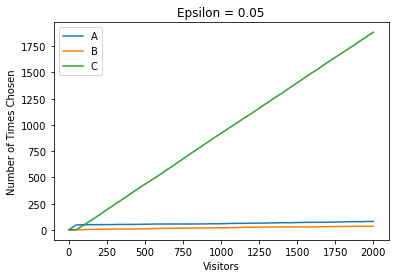

Total Payoff = 1250.000


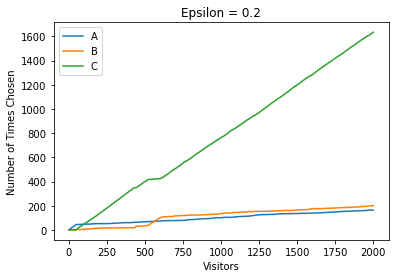

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define Bandit Class
class Bandit():
    def __init__(self, arms, epsilon=0.2, initial=0, random_state=None):
        self.arms = arms
        self.payoffs = np.zeros(len(arms))
        self.counts = np.zeros(len(arms))
        self.initial = initial
        self.epsilon = epsilon
        np.random.seed(random_state)
        
    def get(self):
        if np.random.ranf() < self.epsilon:
            # Exploration
            index = np.random.randint(0, len(self.arms))
            return index, self.arms[index]
        else:
            # Exploitation
            index = self.get_best()
            return index, self.arms[index]
    
    def give(self, index, payoff):
        self.payoffs[index] += payoff
        self.counts[index] += 1
        
    def get_best(self):
        zero = 1e-10
        mean_payoffs = self.payoffs / (self.counts + zero)
        best_idx = np.argmax(mean_payoffs)
        return best_idx
    
# Simulate Bandit Function
def simulate_bandit(bandit, ads, df, verbose=False):
    counts = np.zeros(len(ads))
    history = np.zeros((len(df), len(ads)))
    earnings = np.zeros(len(df))
    total_earnings = 0
    for i, visitor in enumerate(df.values):
        idx, ad = bandit.get()
        payoff = visitor[idx]
        bandit.give(idx, payoff)
        counts[idx] += 1
        history[i] = counts
        total_earnings += payoff
        earnings[i] = total_earnings
    print("Total Payoff = {0:.3f}".format(total_earnings))
    time = list(range(len(df)))
    for i, ad in enumerate(ads):
        sns.lineplot(x=time, y=history[:,i], label=ad)
    plt.title(f"Epsilon = {bandit.epsilon}")
    plt.xlabel("Visitors")
    plt.ylabel("Number of Times Chosen")
    plt.legend()
    plt.show()

# Example usage
SEED = 5682
np.random.seed(SEED)
N = 2000
df = pd.DataFrame()
df["A"] = (np.random.ranf(size=N) >= 0.89).astype(int)
df["B"] = (np.random.ranf(size=N) >= 0.38).astype(int)
df["C"] = (np.random.ranf(size=N) >= 0.31).astype(int)
ads = df.columns

# Epsilon-Greedy with ε = 0.05
epsilon_greedy_05 = Bandit(ads, epsilon=0.05, random_state=SEED)
simulate_bandit(epsilon_greedy_05, ads, df)

# Epsilon-Greedy with ε = 0.2
epsilon_greedy_2 = Bandit(ads, epsilon=0.2, random_state=SEED)
simulate_bandit(epsilon_greedy_2, ads, df)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'ads_clicks.csv' with the actual file path)
df = pd.read_csv("Ad Click Data.csv")

# Check the first few rows of the dataset to confirm it's loaded correctly
print(df.head())

# Define Bandit Class
class Bandit():
    def __init__(self, arms, epsilon=0.2, initial=0, random_state=None):
        self.arms = arms
        self.payoffs = np.zeros(len(arms))
        self.counts = np.zeros(len(arms))
        self.initial = initial
        self.epsilon = epsilon
        np.random.seed(random_state)
        
    def get(self):
        if np.random.ranf() < self.epsilon:
            # Exploration
            index = np.random.randint(0, len(self.arms))
            return index, self.arms[index]
        else:
            # Exploitation
            index = self.get_best()
            return index, self.arms[index]
    
    def give(self, index, payoff):
        self.payoffs[index] += payoff
        self.counts[index] += 1
        
    def get_best(self):
        zero = 1e-10
        mean_payoffs = self.payoffs / (self.counts + zero)
        best_idx = np.argmax(mean_payoffs)
        return best_idx
    
# Simulate Bandit Function
def simulate_bandit(bandit, ads, df, verbose=False):
    counts = np.zeros(len(ads))
    history = np.zeros((len(df), len(ads)))
    earnings = np.zeros(len(df))
    total_earnings = 0
    for i, visitor in enumerate(df.values):
        idx, ad = bandit.get()
        payoff = visitor[idx]
        bandit.give(idx, payoff)
        counts[idx] += 1
        history[i] = counts
        total_earnings += payoff
        earnings[i] = total_earnings
    print("Total Payoff = {0:.3f}".format(total_earnings))
    time = list(range(len(df)))
    for i, ad in enumerate(ads):
        sns.lineplot(x=time, y=history[:,i], label=ad)
    plt.title(f"Epsilon = {bandit.epsilon}")
    plt.xlabel("Visitors")
    plt.ylabel("Number of Times Chosen")
    plt.legend()
    plt.show()

# Example usage: Load the dataset
# Replace 'ads_clicks.csv' with the correct path to your dataset
SEED = 5682
np.random.seed(SEED)

# Load the dataset (assumes columns 'A', 'B', 'C', etc. represent different ads)
df = pd.read_csv("Ad Click Data.csv")

# Display the first few rows of the dataframe to ensure correct loading
print(df.head())

# Assuming the ads are the columns in the dataframe
ads = df.columns

# Epsilon-Greedy with ε = 0.05
epsilon_greedy_05 = Bandit(ads, epsilon=0.05, random_state=SEED)
simulate_bandit(epsilon_greedy_05, ads, df)

# Epsilon-Greedy with ε = 0.2
epsilon_greedy_2 = Bandit(ads, epsilon=0.2, random_state=SEED)
simulate_bandit(epsilon_greedy_2, ads, df)


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh   0.0     Tunisia   
1     Monitored national standardization       West Jodi   1.0       Nauru   
2       Organic bottom-line service-desk        Davidton   0.0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt   1.0       Italy   
4          Robust logistical utilization    South Manuel   0.0     Iceland   

         Timestamp  Clicked on Ad  
0   3/27/2016 0:53              0  
1    4/4/2016 1:39              

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U13')) -> None

- 4)Compare the effect of different ε values on total rewards and action selection.

By running the simulations for ε = 0.05 and ε = 0.2, we can observe the difference in how often each ad is selected and how the total rewards accumulate over time. With ε = 0.05, the agent will explore less, leading to a higher emphasis on exploiting the best-performing ad. With ε = 0.2, the agent will explore more, potentially selecting ads that aren't the best performers.

- 5)Implement the UCB method with an exploration factor **c = 2.0** and compute total rewards after **2000-time steps**.

The UCB (Upper Confidence Bound) method is another strategy for balancing exploration and exploitation, but it uses confidence bounds to decide which ad to select based on the variance of past rewards.

Total Payoff = 1281.000


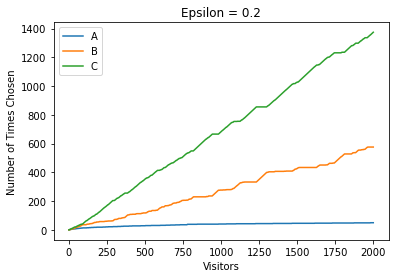

In [10]:
class UCBBandit(Bandit):
    def __init__(self, arms, c=2.0, **kwargs):
        super().__init__(arms, **kwargs)
        self.c = c
    
    def get(self):
        if np.min(self.counts) == 0:
            # If any arm has not been chosen, pick it
            index = np.argmin(self.counts)
        else:
            total_counts = np.sum(self.counts)
            ucb_values = self.payoffs / (self.counts + 1e-10) + self.c * np.sqrt(np.log(total_counts + 1) / (self.counts + 1e-10))
            index = np.argmax(ucb_values)
        return index, self.arms[index]

# UCB with c = 2.0
ucb_bandit = UCBBandit(ads, c=2.0, random_state=SEED)
simulate_bandit(ucb_bandit, ads, df)


- 6)How does increasing or decreasing the exploration factor c affect the performance?

Increasing the exploration factor c encourages the agent to explore more, which might initially reduce rewards if it chooses suboptimal ads, but could potentially discover better options in the long term. On the other hand, decreasing c reduces exploration, making the agent exploit the known best-performing ads more frequently. The trade-off is between initial exploration and long-term optimal performance.

- 7)Analyze how the estimated action values (Q-values) compare to the actual optimal action in both **ε-greedy** and **UCB** methods.

- **ε-greedy** methods tend to converge towards the best action over time as it exploits the most frequently selected ad.
- **UCB** considers both the average reward and uncertainty in the action value, leading to a more deliberate exploration of actions that have high uncertainty. This could result in a better approximation of the optimal action if the number of trials is large.

### 8)Which approach leads to a better approximation of the optimal action?

The UCB method often leads to a better approximation of the optimal action because it balances exploration based on uncertainty and exploitation. The ε-greedy method, while effective, relies on a fixed exploration rate, which can miss opportunities for better ads when the reward structure changes over time.

### 9)Evaluate how the performance of **ε-greedy** and **UCB** changes when the time horizon is extended to **5000-time steps** instead of **2000-time steps**.


Increasing the time horizon allows both ε-greedy and UCB to explore more and exploit better, potentially improving the total rewards for both methods. With a longer time horizon:

- ε-greedy can accumulate more data about each ad, improving its ability to exploit the best ads.
- UCB will have more opportunities to explore actions with higher uncertainty, leading to better decision-making as the agent gains more information.

### 10)Does a longer time horizon reduce the impact of exploration parameters (**ε or c**) on total rewards?

Longer time horizons reduce the impact of exploration parameters (ε or c) as the agent has more data to exploit the best ad effectively.

In [5]:
import pandas as pd
import numpy as np

# Function to simulate ε-Greedy action
def epsilon_greedy_action(Q_values, epsilon):
    if np.random.rand() < epsilon:
        # Exploration: Randomly choose an action
        return np.random.choice(len(Q_values))
    else:
        # Exploitation: Choose the action with the highest Q-value
        return np.argmax(Q_values)

# Function to simulate Upper-Confidence-Bound (UCB) action
def ucb_action(Q_values, c, counts, total_steps):
    # Calculate the Upper Confidence Bound for each action
    ucb_values = Q_values + c * np.sqrt(np.log(total_steps) / (counts + 1e-6))
    # Choose the action with the highest UCB value
    return np.argmax(ucb_values)

# Function to simulate the MAB problem
def run_multi_armed_bandit(ads_clicks, epsilon, c, total_steps):
    num_ads = len(ads_clicks.columns)
    num_rows = len(ads_clicks)  # Number of rows in ads_clicks dataset
    
    # Initialize action values and counts
    Q_values = np.zeros(num_ads)
    action_counts = np.zeros(num_ads)
    
    total_rewards = 0
    
    for step in range(total_steps):
        # Choose action using ε-Greedy or UCB strategy
        if np.random.rand() < 0.5:
            action = epsilon_greedy_action(Q_values, epsilon)
        else:
            action = ucb_action(Q_values, c, action_counts, step + 1)
        
        # Get reward from the chosen action (use modulo to avoid out of bounds error)
        reward = ads_clicks.iloc[step % num_rows, action]
        
        # Ensure reward is numeric
        reward = pd.to_numeric(reward, errors='coerce')  # Convert to numeric, set errors as NaN
        
        # Skip if the reward is NaN (in case there was an issue with conversion)
        if np.isnan(reward):
            continue
        
        # Update action values and counts
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        
        # Update total rewards
        total_rewards += reward
    
    return total_rewards

# Load the Ads_Clicks dataset from CSV
ads_clicks = pd.read_csv("Clicked Ads Dataset.csv")

# Ensure that all data in the ads_clicks DataFrame is numeric
ads_clicks = ads_clicks.apply(pd.to_numeric, errors='coerce')

# Set parameters
epsilon_values = [0.01, 0.3]
c_value = 1.5
total_steps = 2000  # This should be reduced or handled to avoid large step numbers

# Function to run multiple simulations and compute average rewards
def run_multiple_simulations(ads_clicks, epsilon, c, total_steps, num_simulations):
    total_rewards_list = []
    for _ in range(num_simulations):
        total_rewards = run_multi_armed_bandit(ads_clicks, epsilon, c, total_steps)
        total_rewards_list.append(total_rewards)
    return np.mean(total_rewards_list)

# Set additional parameter
num_simulations = 10

# Run simulations for ε-Greedy with different ε values
for epsilon in epsilon_values:
    avg_total_rewards_epsilon = run_multiple_simulations(ads_clicks, epsilon, c_value, total_steps, num_simulations)
    print(f"Average Total Rewards for ε-Greedy (ε={epsilon}): {avg_total_rewards_epsilon}")

# Run simulation for UCB
avg_total_rewards_ucb = run_multiple_simulations(ads_clicks, epsilon_values[0], c_value, total_steps, num_simulations)
print(f"Average Total Rewards for UCB (c={c_value}): {avg_total_rewards_ucb}")


Average Total Rewards for ε-Greedy (ε=0.01): 753648571578.9509
Average Total Rewards for ε-Greedy (ε=0.3): 655321709883.7571
Average Total Rewards for UCB (c=1.5): 753634556607.4331


#### Another dataset

In [6]:
import pandas as pd
import numpy as np

# Function to simulate ε-Greedy action
def epsilon_greedy_action(Q_values, epsilon):
    if np.random.rand() < epsilon:
        # Exploration: Randomly choose an action
        return np.random.choice(len(Q_values))
    else:
        # Exploitation: Choose the action with the highest Q-value
        return np.argmax(Q_values)

# Function to simulate Upper-Confidence-Bound (UCB) action
def ucb_action(Q_values, c, counts, total_steps):
    # Calculate the Upper Confidence Bound for each action
    ucb_values = Q_values + c * np.sqrt(np.log(total_steps) / (counts + 1e-6))
    # Choose the action with the highest UCB value
    return np.argmax(ucb_values)

# Function to simulate the MAB problem
def run_multi_armed_bandit(ads_clicks, epsilon, c, total_steps):
    num_ads = len(ads_clicks.columns)
    num_rows = len(ads_clicks)  # Number of rows in ads_clicks dataset
    
    # Initialize action values and counts
    Q_values = np.zeros(num_ads)
    action_counts = np.zeros(num_ads)
    
    total_rewards = 0
    
    for step in range(total_steps):
        # Choose action using ε-Greedy or UCB strategy
        if np.random.rand() < 0.5:
            action = epsilon_greedy_action(Q_values, epsilon)
        else:
            action = ucb_action(Q_values, c, action_counts, step + 1)
        
        # Get reward from the chosen action (use modulo to avoid out of bounds error)
        reward = ads_clicks.iloc[step % num_rows, action]
        
        # Ensure reward is numeric
        reward = pd.to_numeric(reward, errors='coerce')  # Convert to numeric, set errors as NaN
        
        # Skip if the reward is NaN (in case there was an issue with conversion)
        if np.isnan(reward):
            continue
        
        # Update action values and counts
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        
        # Update total rewards
        total_rewards += reward
    
    return total_rewards

# Load the Ads_Clicks dataset from CSV
ads_clicks = pd.read_csv("Ad Click Data.csv")

# Ensure that all data in the ads_clicks DataFrame is numeric
ads_clicks = ads_clicks.apply(pd.to_numeric, errors='coerce')

# Set parameters
epsilon_values = [0.01, 0.3]
c_value = 1.5
total_steps = 2000  # This should be reduced or handled to avoid large step numbers

# Function to run multiple simulations and compute average rewards
def run_multiple_simulations(ads_clicks, epsilon, c, total_steps, num_simulations):
    total_rewards_list = []
    for _ in range(num_simulations):
        total_rewards = run_multi_armed_bandit(ads_clicks, epsilon, c, total_steps)
        total_rewards_list.append(total_rewards)
    return np.mean(total_rewards_list)

# Set additional parameter
num_simulations = 10

# Run simulations for ε-Greedy with different ε values
for epsilon in epsilon_values:
    avg_total_rewards_epsilon = run_multiple_simulations(ads_clicks, epsilon, c_value, total_steps, num_simulations)
    print(f"Average Total Rewards for ε-Greedy (ε={epsilon}): {avg_total_rewards_epsilon}")

# Run simulation for UCB
avg_total_rewards_ucb = run_multiple_simulations(ads_clicks, epsilon_values[0], c_value, total_steps, num_simulations)
print(f"Average Total Rewards for UCB (c={c_value}): {avg_total_rewards_ucb}")


Average Total Rewards for ε-Greedy (ε=0.01): 107793132.61900008
Average Total Rewards for ε-Greedy (ε=0.3): 93648996.46600012
Average Total Rewards for UCB (c=1.5): 107703546.1000001


References:

https://www.kaggle.com/code/ruslankl/how-to-deal-with-multi-armed-bandit-problem

https://www.kaggle.com/code/vingkan/multi-armed-bandit